In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data

In [2]:
df = pd.read_csv('data_preprocessed_normalised_over.csv')

In [3]:
df.head()

,Times Pregnant,Plasma Glucose Concentration,BMI,Age,Outcome
0,1,85,26.6,31,0
1,1,89,28.1,21,0
2,5,116,25.6,30,0
3,4,110,37.6,30,0
4,3,126,39.3,27,0


Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Times Pregnant                878 non-null    int64  
 1   Plasma Glucose Concentration  878 non-null    int64  
 2   BMI                           878 non-null    float64
 3   Age                           878 non-null    int64  
 4   Outcome                       878 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.4 KB


In [5]:
df.describe()

,Times Pregnant,Plasma Glucose Concentration,BMI,Age,Outcome
count,878.000000,878.000000,878.000000,878.000000,878.000000
mean,4.247153,125.825740,32.828246,33.925968,0.500000
std,3.465314,31.518548,6.396694,11.037419,0.500285
min,0.000000,44.000000,18.200000,21.000000,0.000000
25%,1.000000,102.000000,28.000000,24.000000,0.000000
50%,3.000000,121.000000,32.900000,31.000000,0.500000
75%,7.000000,147.000000,36.800000,41.000000,1.000000
max,13.000000,198.000000,50.000000,66.000000,1.000000


In [6]:
df['Outcome'].value_counts()

0    439
1    439
Name: Outcome, dtype: int64

Train | Test Split and Scaling

In [7]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Logistic Regression Model (Sklearn)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log_model = LogisticRegression()

In [14]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

Model Performance on Classification Tasks

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [16]:
y_pred = log_model.predict(scaled_X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.7272727272727273

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       111
           1       0.72      0.73      0.73       109

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.73      0.73      0.73       220



In [19]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.72727273, 0.72727273])

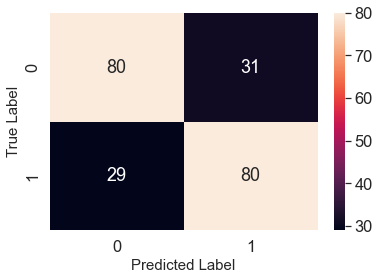

In [20]:
cm = confusion_matrix(y_test,y_pred)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [21]:
X_train.iloc[0]

Times Pregnant                    6.0
Plasma Glucose Concentration    109.0
BMI                              25.0
Age                              27.0
Name: 334, dtype: float64

In [22]:
y_train.iloc[0]

0

In [23]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [24]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

Testing other methods such as by using best iterations

In [25]:
from sklearn import linear_model
train_score_list=[]
test_score_list=[]
arange=np.arange(1,100)
for each in range (1,len(arange)+1):
    log_iter = linear_model.LogisticRegression(random_state = 101,max_iter= each)
    log_iter.fit(scaled_X_train,y_train)
    train_score_list.append(log_iter.score(scaled_X_train,y_train))
    test_score_list.append(log_iter.score(scaled_X_test,y_test))    
print("Best accuracy(test) is {} with iteration n. = {}".format(np.max(test_score_list),test_score_list.index(np.max(test_score_list))+ 1))
print("Best accuracy(train) is {} with iteration n. = {}".format(np.max(train_score_list),train_score_list.index(np.max(train_score_list))+ 1))

C:\Users\windb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\windb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best accuracy(test) is 0.75 with iteration n. = 1
Best accuracy(train) is 0.7598784194528876 with iteration n. = 3


In [26]:
best_max_iter_parameter = test_score_list.index(np.max(test_score_list))+ 1
log_iter_final = linear_model.LogisticRegression(random_state = 101,max_iter= best_max_iter_parameter)
log_iter_final.fit(scaled_X_train,y_train)
y_predicted = log_iter_final.predict(scaled_X_test)
y_true = y_test

print("Score: ",log_iter_final.score(scaled_X_train,y_train))

Score:  0.7583586626139818


C:\Users\windb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
accuracy_score(y_true,y_predicted)

0.75

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       111
           1       0.75      0.75      0.75       109

    accuracy                           0.75       220
   macro avg       0.75      0.75      0.75       220
weighted avg       0.75      0.75      0.75       220



In [29]:
from sklearn.metrics import f1_score
f1_score(y_true, y_predicted, average=None)

array([0.75113122, 0.74885845])

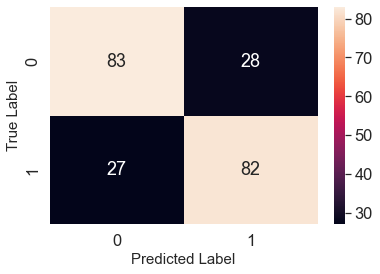

In [30]:
cm = confusion_matrix(y_true,y_predicted)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

Logistic Regression gridsearch manual

In [31]:
##https://gist.github.com/accessnash/c329252828d9cc7eb5bffdb5fc2ce28d

In [32]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space, 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

In [33]:
logreg = LogisticRegression()

In [34]:
from sklearn.model_selection import GridSearchCV
log_grid = GridSearchCV(logreg, param_grid, cv=5)

In [35]:
log_grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [36]:
print("Tuned Logistic Regression Parameters: {}".format(log_grid.best_params_)) 
print("Best score is {}".format(log_grid.best_score_))

Tuned Logistic Regression Parameters: {'C': 8.483428982440725e-05, 'penalty': 'l2', 'solver': 'liblinear'}
Best score is 0.7569743233865371


In [37]:
y_predict_grid = log_grid.predict(scaled_X_test)

In [38]:
accuracy_score(y_test,y_predict_grid)

0.75

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_predict_grid))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       111
           1       0.75      0.75      0.75       109

    accuracy                           0.75       220
   macro avg       0.75      0.75      0.75       220
weighted avg       0.75      0.75      0.75       220



In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict_grid, average=None)

array([0.75113122, 0.74885845])

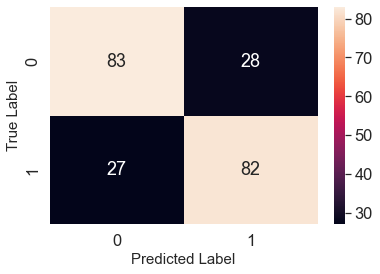

In [41]:
cm = confusion_matrix(y_test,y_predict_grid)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

Logistic regression CV

In [42]:
from sklearn.linear_model import LogisticRegressionCV
Log_cv = LogisticRegressionCV(cv=5, random_state=101,solver= 'liblinear').fit(scaled_X_test, y_test)

In [43]:
y_predicted_log = Log_cv.predict(scaled_X_test)

In [44]:
accuracy_score(y_test,y_predicted_log)

0.7681818181818182

In [45]:
print(classification_report(y_test,y_predicted_log))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       111
           1       0.77      0.76      0.76       109

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predicted_log, average=None)

array([0.77130045, 0.76497696])

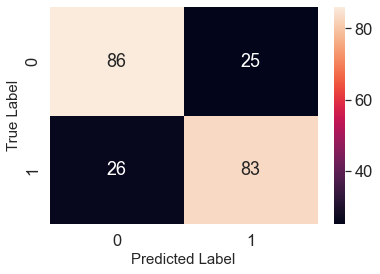

In [47]:
cm = confusion_matrix(y_test,y_predicted_log)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

Evaluating Curves and AUC

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

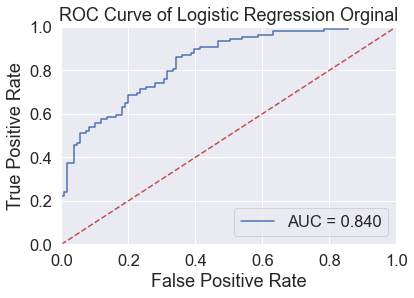

In [49]:
#original method
log= LogisticRegression()
log.fit(scaled_X_train,y_train)
y_scores=log.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Orginal')
plt.show()

C:\Users\windb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


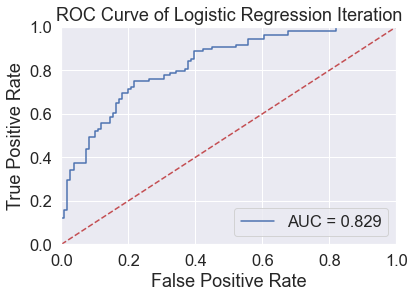

In [50]:
log_iter_final = linear_model.LogisticRegression(random_state = 101,max_iter= best_max_iter_parameter)
log_iter_final.fit(scaled_X_train,y_train)
y_predicted = log_iter_final.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_predicted[:,1])
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Iteration')
plt.show()

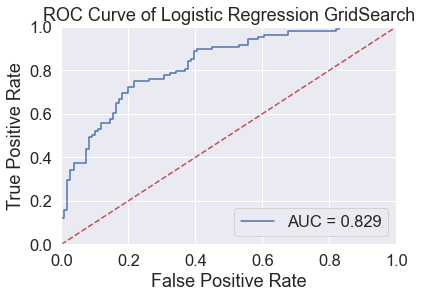

In [51]:
y_predicted_log = log_grid.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_predicted_log[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression GridSearch')
plt.show()

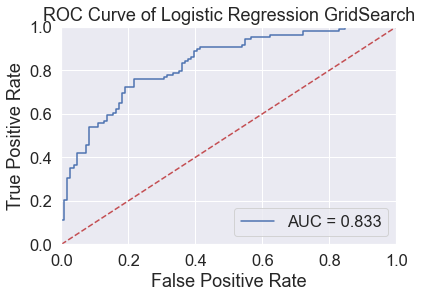

In [52]:
y_predicted_log = Log_cv.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_predicted_log[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression GridSearch')
plt.show()

Thus gridsearch gives the best model in terms of f1 and predict

Testing prediction accuracy

Saving data to GUI

In [53]:
import pickle
log_model = pickle.dump(log, open('log_grid.h5', 'wb'))